In [2]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
import os.path as path
import os
os.environ['OMP_NUM_THREADS'] = '2'

#import lib.dist as dist
#import lib.utils as utils


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({
    'font.family' : 'STIXGeneral',
    'mathtext.fontset' : 'stix',
    'xtick.direction' : 'in' ,
    'xtick.labelsize' : 17.5 ,
    'xtick.top' : True ,
    'xtick.major.width' : 1.5,
    'xtick.major.size' : 6,
    'ytick.direction' : 'in' ,
    'ytick.labelsize' : 17.5 ,
    'ytick.right' : True ,
    'ytick.major.width' : 1.5,
    'ytick.major.size' : 6,
    'axes.labelsize' : 18,
    'legend.frameon' : False,
    'legend.fontsize' : 13,
    'legend.handlelength' : 1.5,
    'savefig.dpi' : 600, 
    'savefig.bbox' : 'tight',
    'axes.linewidth' : 1.5,
})
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
torch.__version__

'1.7.1'

# DOCC

In [3]:
U_c1, U_c2 = 2.44, 2.59
b = 60


U = np.array([0.01*i for i in range(100, 401)])
U_up, U_dn = [], []
for i, u in enumerate(U):
    if path.isfile(f'./test_LR2/Bethe_14_beta{b:d}/Giwn_recon-{u:.2f}.dat')==True: U_up.append(u)
    if path.isfile(f'./test_LR2/Bethe_41_beta{b:d}/Giwn_recon-{u:.2f}.dat')==True: U_dn.append(u)
U_up = np.array(U_up)
U_dn = np.array(U_dn)
U_len = len(U_up)+len(U_dn)
UU = np.concatenate([U_up, U_dn])

self_up = np.zeros((len(U_up), 180), dtype = 'float64')
self_dn = np.zeros((len(U_dn), 180), dtype = 'float64')
Z_up = np.zeros(len(U_up), dtype = 'float64')
Z_dn = np.zeros(len(U_dn), dtype = 'float64')

for i, u in enumerate(U_up):
    w, sr, si = np.loadtxt(f'./test_LR2/Bethe_14_beta{b:d}/self_energy_recon-{u:.2f}.dat', \
                                                                   unpack=True, dtype='float64')
    self_up[i] = si
    a = si[0]*b/np.pi
    Z_up[i] = 1/(1-a)
for i, u in enumerate(U_dn):
    w, sr, si = np.loadtxt(f'./test_LR2/Bethe_41_beta{b:d}/self_energy_recon-{u:.2f}.dat', \
                                                                   unpack=True, dtype='float64')
    self_dn[i] = si
    a = si[0]*b/np.pi
    Z_dn[i] = 1/(1-a)

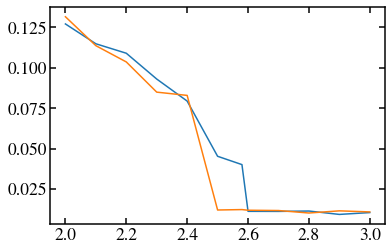

In [85]:
plt.plot(U_up, Z_up)
plt.plot(U_up, Z_dn)

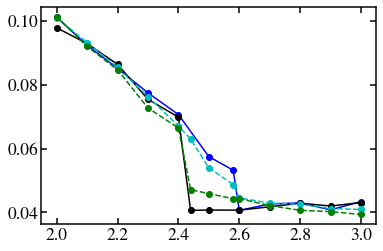

In [187]:
Uup, docc_up = np.loadtxt('LR2_docc_up.txt', unpack=True, dtype = 'float64')
Udn, docc_dn = np.loadtxt('LR2_docc_dn.txt', unpack=True, dtype = 'float64')
plt.plot(Uup, docc_up, 'bo-')
plt.plot(Udn, docc_dn, 'ko-')
#plt.xlim(2.30,2.5)
#plt.ylim(0.04, 0.07)

UU, docc_up = np.loadtxt('docc_up.txt', unpack=True, dtype = 'float64')
UU, docc_dn = np.loadtxt('docc_dn.txt', unpack=True, dtype = 'float64')
plt.plot(UU, docc_up, 'co--')
plt.plot(UU, docc_dn, 'go--')

Text(0.5, 1.0, 'z dim = 8')

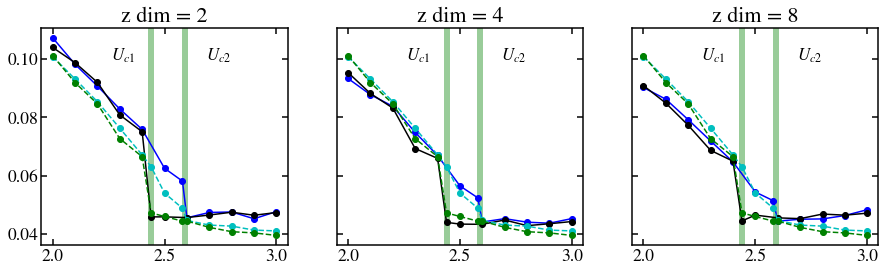

In [6]:
U_c1, U_c2 = 2.44, 2.59

fig, ax = plt.subplots(1,3, figsize=(15,4), sharey=True)

for i in range (3):
    ax[i].axvline(U_c1, c = '#99CC99', lw = '6')
    ax[i].axvline(U_c2, c = '#99CC99', lw = '6')
    ax[i].annotate(r'$U_{c1}$', xy=(0.33, 0.85), xycoords = 'axes fraction', fontsize=17, ha='center')
    ax[i].annotate(r'$U_{c2}$', xy=(0.72, 0.85), xycoords = 'axes fraction', fontsize=17, ha='center')


Uup, docc_up = np.loadtxt('LR2_docc_up.txt', unpack=True, dtype = 'float64')
Udn, docc_dn = np.loadtxt('LR2_docc_dn.txt', unpack=True, dtype = 'float64')
ax[0].plot(Uup, docc_up, 'bo-')
ax[0].plot(Udn, docc_dn, 'ko-')

Uup, docc_up = np.loadtxt('docc_up.txt', unpack=True, dtype = 'float64')
Udn, docc_dn = np.loadtxt('docc_dn.txt', unpack=True, dtype = 'float64')
ax[0].plot(Uup, docc_up, 'co--')
ax[0].plot(Udn, docc_dn, 'go--')
ax[0].set_title('z dim = 2', fontsize=22)

Uup, docc_up = np.loadtxt('LR4_docc_up.txt', unpack=True, dtype = 'float64')
Udn, docc_dn = np.loadtxt('LR4_docc_dn.txt', unpack=True, dtype = 'float64')
ax[1].plot(Uup, docc_up, 'bo-')
ax[1].plot(Udn, docc_dn, 'ko-')

Uup, docc_up = np.loadtxt('docc_up.txt', unpack=True, dtype = 'float64')
Udn, docc_dn = np.loadtxt('docc_dn.txt', unpack=True, dtype = 'float64')
ax[1].plot(Uup, docc_up, 'co--')
ax[1].plot(Udn, docc_dn, 'go--')
ax[1].set_title('z dim = 4', fontsize=22)

Uup, docc_up = np.loadtxt('LR8_docc_up.txt', unpack=True, dtype = 'float64')
Udn, docc_dn = np.loadtxt('LR8_docc_dn.txt', unpack=True, dtype = 'float64')
ax[2].plot(Uup, docc_up, 'bo-')
ax[2].plot(Udn, docc_dn, 'ko-')

Uup, docc_up = np.loadtxt('docc_up.txt', unpack=True, dtype = 'float64')
Udn, docc_dn = np.loadtxt('docc_dn.txt', unpack=True, dtype = 'float64')
ax[2].plot(Uup, docc_up, 'co--')
ax[2].plot(Udn, docc_dn, 'go--')
ax[2].set_title('z dim = 8', fontsize=22)

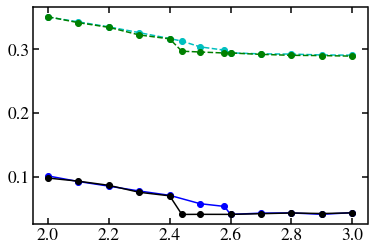

In [190]:
_, docc_up = np.loadtxt('LR2_docc_up.txt', unpack=True, dtype = 'float64')
_, docc_dn = np.loadtxt('LR2_docc_dn.txt', unpack=True, dtype = 'float64')
plt.plot(U_up, docc_up, 'bo-')
plt.plot(U_dn, docc_dn, 'ko-')
#plt.xlim(2.30,2.5)
#plt.ylim(0.04, 0.07)

UU, docc_up = np.loadtxt('docc_up.txt', unpack=True, dtype = 'float64')
UU, docc_dn = np.loadtxt('docc_dn.txt', unpack=True, dtype = 'float64')
plt.plot(UU, docc_up, 'co--')
plt.plot(UU, docc_dn, 'go--')

Text(0.5, 0, '$U/D$')

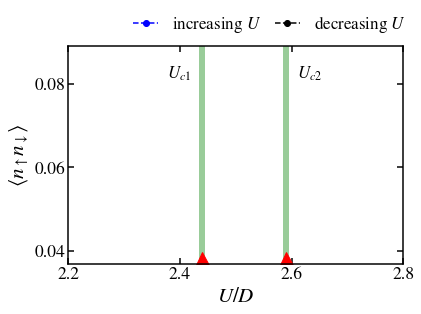

In [12]:
U_c1, U_c2 = 2.44, 2.59
_, docc_up = np.loadtxt('LR2_docc_up.txt', unpack=True, dtype = 'float64')
_, docc_dn = np.loadtxt('LR2_docc_dn.txt', unpack=True, dtype = 'float64')

plt.axvline(U_c1, c = '#99CC99', lw = '6')
plt.axvline(U_c2, c = '#99CC99', lw = '6')
plt.annotate(r'$U_{c1}$', xy=(0.33, 0.85), xycoords = 'axes fraction', fontsize=17, ha='center')
plt.annotate(r'$U_{c2}$', xy=(0.72, 0.85), xycoords = 'axes fraction', fontsize=17, ha='center')

plt.plot(U_dn, docc_dn, 'ko--', label=r'decreasing $U$')
plt.plot(U_up, docc_up, 'bo--', label=r'increasing $U$')
plt.plot(np.array([U_c1, U_c2]), np.ones(2)*0.038, 'r^', ms=15)
ax = plt.gca()
handles,labels = ax.get_legend_handles_labels()
ax.legend([handles[1], handles[0]], [labels[1], labels[0]],bbox_to_anchor=(0.6, 1.1), \
           loc='center', ncol=2, columnspacing = 0.8, fontsize=17)
plt.xlim(2.2,2.8)
plt.ylim(0.037, 0.089)
ax.set_xticks([2.2, 2.4, 2.6, 2.8])
ax.set_yticks([0.04, 0.06, 0.08])
ax.set_ylabel(r'$\langle n_\uparrow n_\downarrow\rangle$', fontsize=21)
ax.set_xlabel(r'$U/D$', fontsize=21)

#plt.savefig('fig/fig_docc.pdf')

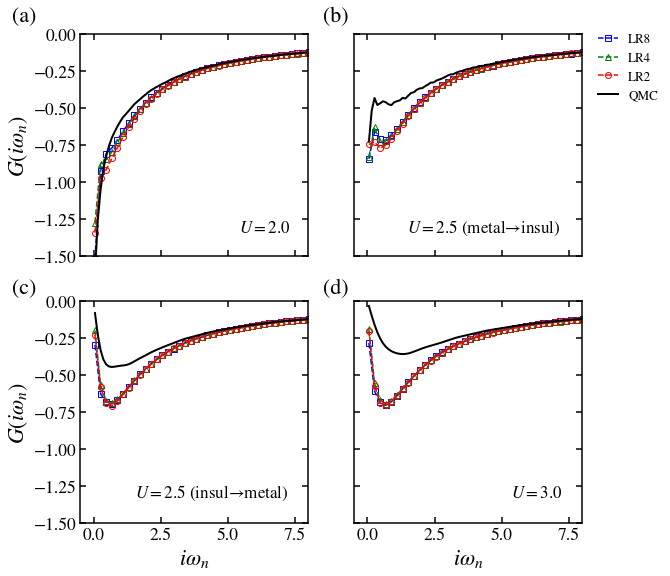

In [78]:
fig, ax = plt.subplots(2,2, figsize=(9, 9), sharey=True, sharex=True)


w, gr, gi = np.loadtxt(f'../3_VAE_recon/test_LR8/Bethe_14_beta60/Giwn_recon-2.00.dat',\
                                                                         unpack=True, dtype='float64')
ax[0,0].plot(w[::2], gi[::2], 'bs--', mfc='none')
w, gr, gi = np.loadtxt(f'../3_VAE_recon/test_LR4/Bethe_14_beta60/Giwn_recon-2.00.dat',\
                                                                         unpack=True, dtype='float64')
ax[0,0].plot(w[::2], gi[::2], 'g^--', mfc='none')
w, gr, gi = np.loadtxt(f'../3_VAE_recon/test_LR2/Bethe_14_beta60/Giwn_recon-2.00.dat',\
                                                                         unpack=True, dtype='float64')
ax[0,0].plot(w[::2], gi[::2], 'ro--', mfc='none')
w, gr, gi = np.loadtxt(f'../1_QMC/train/Bethe_14_beta60/Giwn-2.00.dat',\
                                                                         unpack=True, dtype='float64')
ax[0,0].plot(w, gi, 'k-', lw =2)


w, gr, gi = np.loadtxt(f'../3_VAE_recon/test_LR8/Bethe_14_beta60/Giwn_recon-2.50.dat',\
                                                                         unpack=True, dtype='float64')
ax[0,1].plot(w[::2], gi[::2], 'bs--', mfc='none', label='LR8')
w, gr, gi = np.loadtxt(f'../3_VAE_recon/test_LR4/Bethe_14_beta60/Giwn_recon-2.50.dat',\
                                                                         unpack=True, dtype='float64')
ax[0,1].plot(w[::2], gi[::2], 'g^--', mfc='none', label='LR4')
w, gr, gi = np.loadtxt(f'../3_VAE_recon/test_LR2/Bethe_14_beta60/Giwn_recon-2.50.dat',\
                                                                         unpack=True, dtype='float64')
ax[0,1].plot(w[::2], gi[::2], 'ro--', mfc='none', label='LR2')
w, gr, gi = np.loadtxt(f'../1_QMC/train/Bethe_14_beta60/Giwn-2.50.dat',\
                                                                         unpack=True, dtype='float64')
ax[0,1].plot(w, gi, 'k-', lw =2, label='QMC')
ax[0,1].legend(bbox_to_anchor=(1.2, 0.85), loc='center')


w, gr, gi = np.loadtxt(f'../3_VAE_recon/test_LR8/Bethe_41_beta60/Giwn_recon-2.50.dat',\
                                                                         unpack=True, dtype='float64')
ax[1,0].plot(w[::2], gi[::2], 'bs--', mfc='none')
w, gr, gi = np.loadtxt(f'../3_VAE_recon/test_LR4/Bethe_41_beta60/Giwn_recon-2.50.dat',\
                                                                         unpack=True, dtype='float64')
ax[1,0].plot(w[::2], gi[::2], 'g^--', mfc='none')
w, gr, gi = np.loadtxt(f'../3_VAE_recon/test_LR2/Bethe_41_beta60/Giwn_recon-2.50.dat',\
                                                                         unpack=True, dtype='float64')
ax[1,0].plot(w[::2], gi[::2], 'ro--', mfc='none')
w, gr, gi = np.loadtxt(f'../1_QMC/train/Bethe_41_beta60/Giwn-2.50.dat',\
                                                                         unpack=True, dtype='float64')
ax[1,0].plot(w, gi, 'k-', lw =2)


w, gr, gi = np.loadtxt(f'../3_VAE_recon/test_LR8/Bethe_41_beta60/Giwn_recon-3.00.dat',\
                                                                         unpack=True, dtype='float64')
ax[1,1].plot(w[::2], gi[::2], 'bs--', mfc='none')
w, gr, gi = np.loadtxt(f'../3_VAE_recon/test_LR4/Bethe_41_beta60/Giwn_recon-3.00.dat',\
                                                                         unpack=True, dtype='float64')
ax[1,1].plot(w[::2], gi[::2], 'g^--', mfc='none')
w, gr, gi = np.loadtxt(f'../3_VAE_recon/test_LR2/Bethe_41_beta60/Giwn_recon-3.00.dat',\
                                                                         unpack=True, dtype='float64')
ax[1,1].plot(w[::2], gi[::2], 'ro--', mfc='none')
w, gr, gi = np.loadtxt(f'../1_QMC/train/Bethe_41_beta60/Giwn-3.00.dat',\
                                                                         unpack=True, dtype='float64')
ax[1,1].plot(w, gi, 'k-', lw =2)



ax[1,0].set_xlabel(r'$i\omega_n$', fontsize=22)
ax[1,1].set_xlabel(r'$i\omega_n$', fontsize=22)
ax[0,0].set_ylabel(r'$G(i\omega_n)$', fontsize=22)
ax[1,0].set_ylabel(r'$G(i\omega_n)$', fontsize=22)

plt.gcf().text(0.37, 0.575, r'$U=2.0$', fontsize = 17)
plt.gcf().text(0.63, 0.575, r'$U=2.5$ (metal$\to$insul)', fontsize = 17)
plt.gcf().text(0.21, 0.165, r'$U=2.5$ (insul$\to$metal)', fontsize = 17)
plt.gcf().text(0.79, 0.165, r'$U=3.0$', fontsize = 17)


plt.gcf().text(0.02, 0.9, '(a)', fontsize = 22)
plt.gcf().text(0.5, 0.9, '(b)', fontsize = 22)
plt.gcf().text(0.02, 0.48, '(c)', fontsize = 22)
plt.gcf().text(0.5, 0.48, '(d)', fontsize = 22)

plt.ylim(-1.5, 0)
plt.xlim(-0.5, 8)

plt.savefig('../2_VAE/fig/fig_recon.pdf')

In [18]:


b = 60

w, gr, gi = np.loadtxt(f'../3_VAE_recon/test_LR2/Bethe_14_beta{b:d}/Giwn_recon-2.00.dat', \
                       unpack=True, dtype='float64')
#s_num, s_len = txt.shape
#print("txt.shape =", s_num, s_len)

U = np.array([0.01*i for i in range(100, 401)])
Ur_up, Ur_dn = [], []
for i, u in enumerate(U):
    if path.isfile(f'../3_VAE_recon/test_LR2/Bethe_14_beta{b:d}/Giwn_recon-{u:.2f}.dat')==True: Ur_up.append(u)
    if path.isfile(f'../3_VAE_recon/test_LR2/Bethe_41_beta{b:d}/Giwn_recon-{u:.2f}.dat')==True: Ur_dn.append(u)
Ur_up = np.array(Ur_up)
Ur_dn = np.array(Ur_dn)
Ur_len = len(Ur_up)+len(Ur_dn)
UUr = np.concatenate([Ur_up, Ur_dn])

gup = np.zeros((7, len(Ur_up), 180))
gdn = np.zeros((7, len(Ur_dn), 180))
for i,u in enumerate(Ur_up):
    gup[3,i] = np.loadtxt(f'../3_VAE_recon/test_LR8/Bethe_14_beta{b:d}/Giwn_recon-{u:.2f}.dat',\
                                                                         unpack=True, dtype='float64')[2]
    gup[4,i] = np.loadtxt(f'../3_VAE_recon/test_LR4/Bethe_14_beta{b:d}/Giwn_recon-{u:.2f}.dat',\
                                                                         unpack=True, dtype='float64')[2]
    gup[5,i] = np.loadtxt(f'../3_VAE_recon/test_LR2/Bethe_14_beta{b:d}/Giwn_recon-{u:.2f}.dat',\
                                                                         unpack=True, dtype='float64')[2]
    gup[6,i] = np.loadtxt(f'../1_QMC/train/Bethe_14_beta{b:d}/Giwn-{u:.2f}.dat',\
                                                                         unpack=True, dtype='float64')[2]
for i,u in enumerate(Ur_dn):
    gdn[3,i] = np.loadtxt(f'../3_VAE_recon/test_LR8/Bethe_41_beta{b:d}/Giwn_recon-{u:.2f}.dat',\
                                                                         unpack=True, dtype='float64')[2]
    gdn[4,i] = np.loadtxt(f'../3_VAE_recon/test_LR4/Bethe_41_beta{b:d}/Giwn_recon-{u:.2f}.dat',\
                                                                         unpack=True, dtype='float64')[2]
    gdn[5,i] = np.loadtxt(f'../3_VAE_recon/test_LR2/Bethe_41_beta{b:d}/Giwn_recon-{u:.2f}.dat',\
                                                                         unpack=True, dtype='float64')[2]
    gdn[6,i] = np.loadtxt(f'../1_QMC/train/Bethe_41_beta{b:d}/Giwn-{u:.2f}.dat',\
                                                                         unpack=True, dtype='float64')[2]
    

IndexError: index 3 is out of bounds for axis 0 with size 3

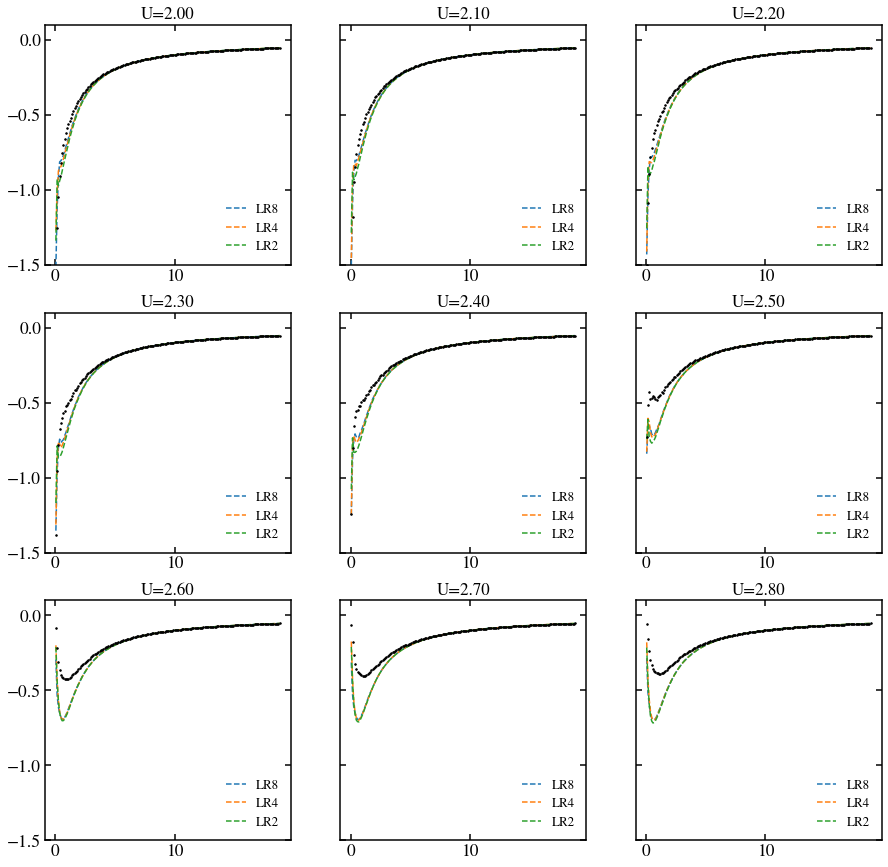

In [193]:
fig, ax = plt.subplots(3,3, figsize=(15,15), sharey=True)
labels = ['NN200', 'NN100', 'NN10', 'LR8', 'LR4', 'LR2']
for i,u in enumerate(Ur_up):
    for j in range(3, 6):
        if np.max(gup[j,i])>3: continue
        ax[int(i/3), i%3].plot(w, gup[j,i], '--', label=labels[j])
    ax[int(i/3), i%3].plot(w, gup[6,i], 'k.', ms=3)
    ax[int(i/3), i%3].set_ylim(-1.5, 0.1)
    ax[int(i/3), i%3].legend(loc='lower right', ncol=1)
    ax[int(i/3), i%3].set_title(f'U={u:.2f}', fontsize=17)

IndexError: index 3 is out of bounds for axis 0 with size 3

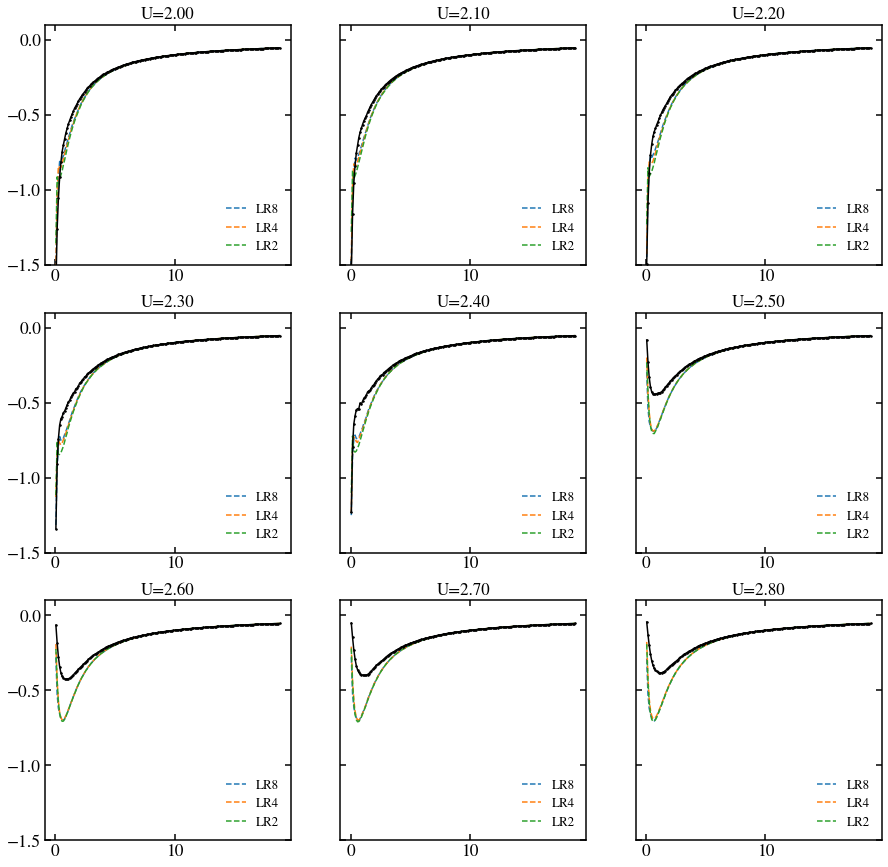

In [178]:
fig, ax = plt.subplots(3,3, figsize=(15,15), sharey=True)
for i,u in enumerate(Ur_dn):
    for j in np.arange(3,6):
        if np.max(gdn[j,i])>3: continue
        ax[int(i/3), i%3].plot(w, gdn[j,i], '--', label=labels[j])
    ax[int(i/3), i%3].plot(w, gdn[6,i], 'k.-', ms=3)
    ax[int(i/3), i%3].set_ylim(-1.5, 0.1)
    ax[int(i/3), i%3].legend(loc='lower right', ncol=1)
    ax[int(i/3), i%3].set_title(f'U={u:.2f}', fontsize=17)